## Hexagonal Cellular Automata

Automata based on bidimensional grid of hexagonal cells, each of which is in
one of two possible states. Every cell interacts only with six neighbours,
which are the cells that are horizontally, vertically, or half diagonally
adjacent.
```
                                  _________________
         / \ / \ / \             |     |     |     |
        |0,0|0,1|0,2|            |     |-1,0 |-1,+1|
         \ / \ / \ / \           |-----|-----|-----|
          |1,0|1,1|1,2|          | 0,-1| i,j | 0,+1|
           \ / \ / \ / \         |-----|-----|-----|
            |2,0|2,1|2,2|        |+1,-1|+1,0 |     |
             \ / \ / \ /         |_____|_____|_____|
```

In [1]:
import ndautomata as ca
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from ndautomata import initializers, neighbours

Using the abstract class `ndautomata.BaseAutomaton` we generate the 2D `Automaton` class defining an hexagonal array of 2 dimension index. Radius is set to 1 in oder to work with neighbours in direct contact with the cell. The number of possible states is set to 2, similar to Elementary automata.

In [2]:
class Automaton(ca.BaseAutomaton):
    neighbours = neighbours.hexagonal(ndim=2, r=1)
    states = 2

In this example, we will generate a Generic rule for our cellular automata evolution. To do so, as first step, it is required to generate a connections array space for a rule function with 7 arguments, one for the cell state and six for each direct neighbour:

$$a{_{i,j}^{t+1}} = \phi \begin{bmatrix} a{_{i-1,j}^{t}}, & ... & a{_{i,j+1}^{t}} \end{bmatrix}$$

To generate the rule based on Generic terms, we can generate a base zero array and set individual values, or just call the random initializer to generate a full random rule.

In [3]:
connections = [Automaton.states] * Automaton.neighbours.size
rule = initializers.random(states=Automaton.states, size=connections)

Once the rule is set, an automata instance can be generated. To do so, we use again the `initializers` module to generate the initial conditions. In this example, we start with a unique active state *1* located at the center of the 2 dimension board. All the rest of cells start with the value *0*.

In [4]:
ic = initializers.center(states=Automaton.states, size=[100, 100])
automaton = Automaton(ic, rule)

Finally, with the help of `matplotlib` we can generate the rule space-time animation. In this animation, each point of pixels shows the cells of the automaton at a single point in time, with time increasing during the animation. Due to plotting tools limitation, the best way to represent the hex grid is by using `pcolormesh`. The mesh grid is shifted on X by half on every increasing position on the Y coordinate.

In [5]:
# Enable interactive plot
%matplotlib widget 

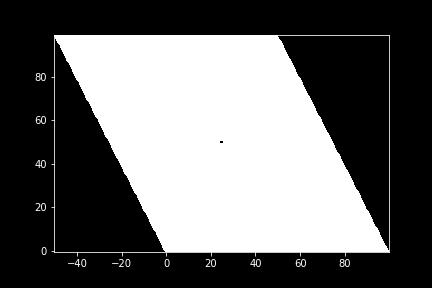

In [6]:
plt.rcParams["image.cmap"] = "binary"
fig, ax = plt.subplots()

x = np.arange(0.0, 100.0, 1)  # len = 100
y = np.arange(0.0, 100.0, 1)  # len = 100
X, Y = np.meshgrid(x, y)
X = X - 0.5 * Y

im = plt.pcolormesh(X, Y, automaton.configuration)
animate = lambda *args: im.set_array(next(automaton))
anim = FuncAnimation(fig, animate)


Total runtime is around `2.3s` on a `Intel(R) Core(TM) i5-8365U CPU @ 1.60GHz`.